In [1]:
import xarray as xr
import geowombat as gw
import os
os.chdir('/home/mmann1123/Documents/github/xr_fresh/')  # change to import xr_fresh
from xr_fresh.feature_calculators import * 
from xr_fresh.extractors import extract_features
from glob import glob
from datetime import datetime
import matplotlib.pyplot as plt
from xr_fresh.utils import xarray_to_rasterio_by_band


In [2]:
%timeit

pdsi_files = '/home/mmann1123/Dropbox/Ethiopia_data/PDSI'
dates = sorted(datetime.strptime(string, f"{pdsi_files}/pdsi_%Y%m.tif")
        for string in sorted(glob(f"{pdsi_files}/pdsi*tif")))

with gw.open(sorted(glob(f"{pdsi_files}/pdsi*tif")), 
             band_names=['ppt'],
             time_names = dates  ) as ds:
                 
    ds = ds.chunk((len(ds.time), 1, 250, 250))
    ds.attrs['nodatavals'] =  (-9999,)
print(ds)

<xarray.DataArray (time: 71, band: 1, y: 285, x: 371)>
dask.array<rechunk-merge, shape=(71, 1, 285, 371), dtype=int16, chunksize=(71, 1, 250, 250), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 14.9 14.86 14.82 14.78 ... 3.537 3.497 3.456 3.416
  * x        (x) float64 33.01 33.05 33.09 33.13 ... 47.84 47.88 47.92 47.96
  * band     (band) <U3 'ppt'
  * time     (time) datetime64[ns] 2013-02-01 2013-03-01 ... 2018-12-01
Attributes:
    transform:     (0.040424187785378464, 0.0, 32.98613723286883, 0.0, -0.040...
    crs:           +init=epsg:4326
    res:           (0.040424187785378464, 0.040424187785378464)
    is_tiled:      0
    nodatavals:    (-9999,)
    scales:        (1.0,)
    offsets:       (0.0,)
    descriptions:  ('pdsi',)
    filename:      /home/mmann1123/Dropbox/Ethiopia_data/PDSI/pdsi_201302.tif
    resampling:    nearest


<Client: 'tcp://127.0.0.1:40495' processes=4 threads=12, memory=33.30 GB>
go to http://localhost:8787/status for dask dashboard


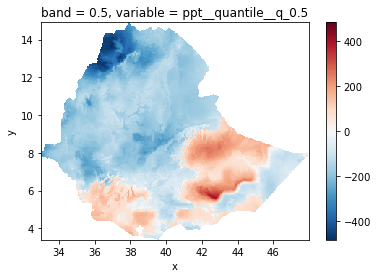

In [3]:
%timeit

from dask.distributed import Client
client = Client()
print(client)


f_dict = { 'maximum':[{}] ,  
          'quantile': [{'q':"0.5"},{'q':'0.95'}] }


features = extract_features(xr_data=ds,
                            feature_dict=f_dict,
                            band='ppt', 
                            na_rm = True)

out = features.sel(variable="ppt__" + 'quantile__q_0.5')
out.plot.imshow()

client.close()

<Client: 'tcp://127.0.0.1:34741' processes=4 threads=12, memory=33.30 GB>
go to http://localhost:8787/status for dask dashboard


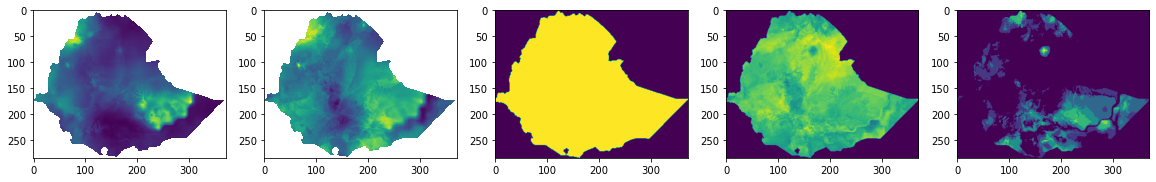

In [4]:
%timeit
complete_f =  { 
                'abs_energy':[{}],
                'mean_abs_change':[{}],
                'variance_larger_than_standard_deviation':[{}],
                'ratio_beyond_r_sigma':[{'r':1},{'r':2},{'r':3}],
                'large_standard_deviation':[{'r':0.5},{'r':1},{'r':2},{'r':3}],
                'symmetry_looking':[{}],
                'sum_values':[{}],
#                 'autocorr':[{'lag':1},{'lag':2}],  # not working
                'ts_complexity_cid_ce':[{}],
                'mean_change':[{}],  # looks weird on ppt series
                'mean_second_derivative_central':[{}], # looks weird on ppt series
                'median':[{}],
                'mean':[{}],
                'length':[{}],
                'standard_deviation':[{}],
                'variance':[{}],
                'skewness':[{}],
                'kurtosis':[{}],
                'absolute_sum_of_changes':[{}],
                'longest_strike_below_mean':[{}],
                'longest_strike_above_mean':[{}],
                'count_above_mean':[{}],
                'first_doy_of_maximum':[{'band':'ppt'}],   # figure out how to remove arg for band
                'last_doy_of_maximum':[{'band':'ppt'}],    
                'last_doy_of_minimum':[{'band':'ppt'}],    
                'first_doy_of_minimum':[{'band':'ppt'}],  
                'autocorrelation':[{'return_p':False,'lag':1},{'return_p':True,'lag':1},
                                   {'return_p':False,'lag':2},{'return_p':True,'lag':2}] , 
                'ratio_value_number_to_time_series_length':[{}],
#                 'kendall_time_correlation':[{}],  # very slow take out vectorize? # not working 
                'linear_time_trend': [{'param':"pvalue"},{'param':"slope"},{'param':"rvalue"}], # slow, should run once then get all desired attributes
                'quantile': [{'q':"0.5"},{'q':"0.95"}],
                'maximum':[{}],
                'minimum':[{}] 
              }
                                   

from dask.distributed import Client
client = Client()
print(client)

 
features = extract_features(xr_data=ds,
                            feature_dict=complete_f,
                            band='ppt', 
                            na_rm = True)

fig, ax = plt.subplots( figsize=(20,20))

for i in range(0,5):
    img = features[i]
    i = i+1
    plt.subplot(1,5,i)
    plt.imshow(img)

client.close()

In [6]:
xarray_to_rasterio(features,'/home/mmann1123/Desktop/', postfix='')

Exported ppt__abs_energy__
Exported ppt__mean_abs_change__
Exported ppt__variance_larger_than_standard_deviation__
Exported ppt__ratio_beyond_r_sigma__r_1
Exported ppt__ratio_beyond_r_sigma__r_2
Exported ppt__ratio_beyond_r_sigma__r_3
Exported ppt__large_standard_deviation__r_0.5
Exported ppt__large_standard_deviation__r_1
Exported ppt__large_standard_deviation__r_2
Exported ppt__large_standard_deviation__r_3
Exported ppt__symmetry_looking__
Exported ppt__sum_values__
Exported ppt__ts_complexity_cid_ce__
Exported ppt__mean_change__
Exported ppt__mean_second_derivative_central__
Exported ppt__median__
Exported ppt__mean__
Exported ppt__length__
Exported ppt__standard_deviation__
Exported ppt__variance__
Exported ppt__skewness__
Exported ppt__kurtosis__
Exported ppt__absolute_sum_of_changes__
Exported ppt__longest_strike_below_mean__
Exported ppt__longest_strike_above_mean__
Exported ppt__count_above_mean__
Exported ppt__first_doy_of_maximum__band_ppt
Exported ppt__last_doy_of_maximum__b